<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/hazi6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [2]:
#adatok beolvasása, train df

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

In [7]:
#normalizálás
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
x_train = []
y_train = []

for i in range(60, 2035):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Modell építése

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 61ms/step - loss: 0.0080
Epoch 2/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 4s 63ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 4s 65ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0017
Epoch 10/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0016
Epoch 13/100
62/62 [====

In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 11s 61ms/step - loss: 7.1545e-04
Epoch 2/100
62/62 [==============================] - 4s 61ms/step - loss: 5.6734e-04
Epoch 3/100
62/62 [==============================] - 4s 61ms/step - loss: 6.3338e-04
Epoch 4/100
62/62 [==============================] - 4s 61ms/step - loss: 7.1964e-04
Epoch 5/100
62/62 [==============================] - 4s 61ms/step - loss: 7.9510e-04
Epoch 6/100
62/62 [==============================] - 4s 61ms/step - loss: 5.8363e-04
Epoch 7/100
62/62 [==============================] - 4s 61ms/step - loss: 6.0746e-04
Epoch 8/100
62/62 [==============================] - 4s 61ms/step - loss: 7.2124e-04
Epoch 9/100
62/62 [==============================] - 4s 61ms/step - loss: 5.9452e-04
Epoch 10/100
62/62 [==============================] - 4s 61ms/step - loss: 5.8350e-04
Epoch 11/100
62/62 [==============================] - 4s 61ms/step - loss: 5.8765e-04
Epoch 12/100
62/62 [==============================] - 4s 61ms/

In [15]:
# adatok beolvasása, test df
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []

for i in range(60, 76):
  x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

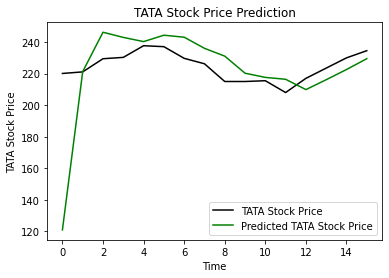

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()